In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from base_data_handler import BaseDataHandler

In [2]:
file_path = "california_housing_data.csv"
handler = BaseDataHandler(file_path)
cols = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude','MedHouseVal']


## Describe original DataFrame:

In [3]:
handler.df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Describe normalized DataFrame:

In [4]:
df_norm = handler.df_norm('zscore')
df_norm.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,5.508083e-17,4.406467e-17,8.262125e-17,-1.032766e-16,-1.101617e-17,2.065531e-18,2.247298e-15,-8.603626e-15,-1.432102e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00,-1.662641e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00,-7.561633e-01
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01,-2.353337e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01,5.014973e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00,2.540411e+00


## Describe log DataFrame

In [5]:
df_log = handler.df_log()
df_log.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,20640.000000
mean,1.244465,3.225135,1.647771,0.070229,7.024116,1.043310,3.571471,-2.072327e+01,0.571959
std,0.470653,0.567748,0.274652,0.165160,0.738524,0.270723,0.059253,3.552800e-15,0.569134
min,-0.693347,0.000000,-0.167054,-1.098612,1.098612,-0.367725,3.482470,-2.072327e+01,-1.897187
25%,0.941334,2.890372,1.490816,0.006061,6.668228,0.887785,3.524300,-2.072327e+01,0.178983
50%,1.262657,3.367296,1.654245,0.047628,7.061334,1.036068,3.533978,-2.072327e+01,0.586119
75%,1.556723,3.610918,1.800452,0.094879,7.452982,1.188532,3.629925,-2.072327e+01,0.973521
max,2.708057,3.951244,4.955187,3.528319,10.482402,7.125551,3.736478,-2.072327e+01,1.609440


In [6]:
handler.try_fill_nan()
handler.try_remove_duplicates()

(True, None)

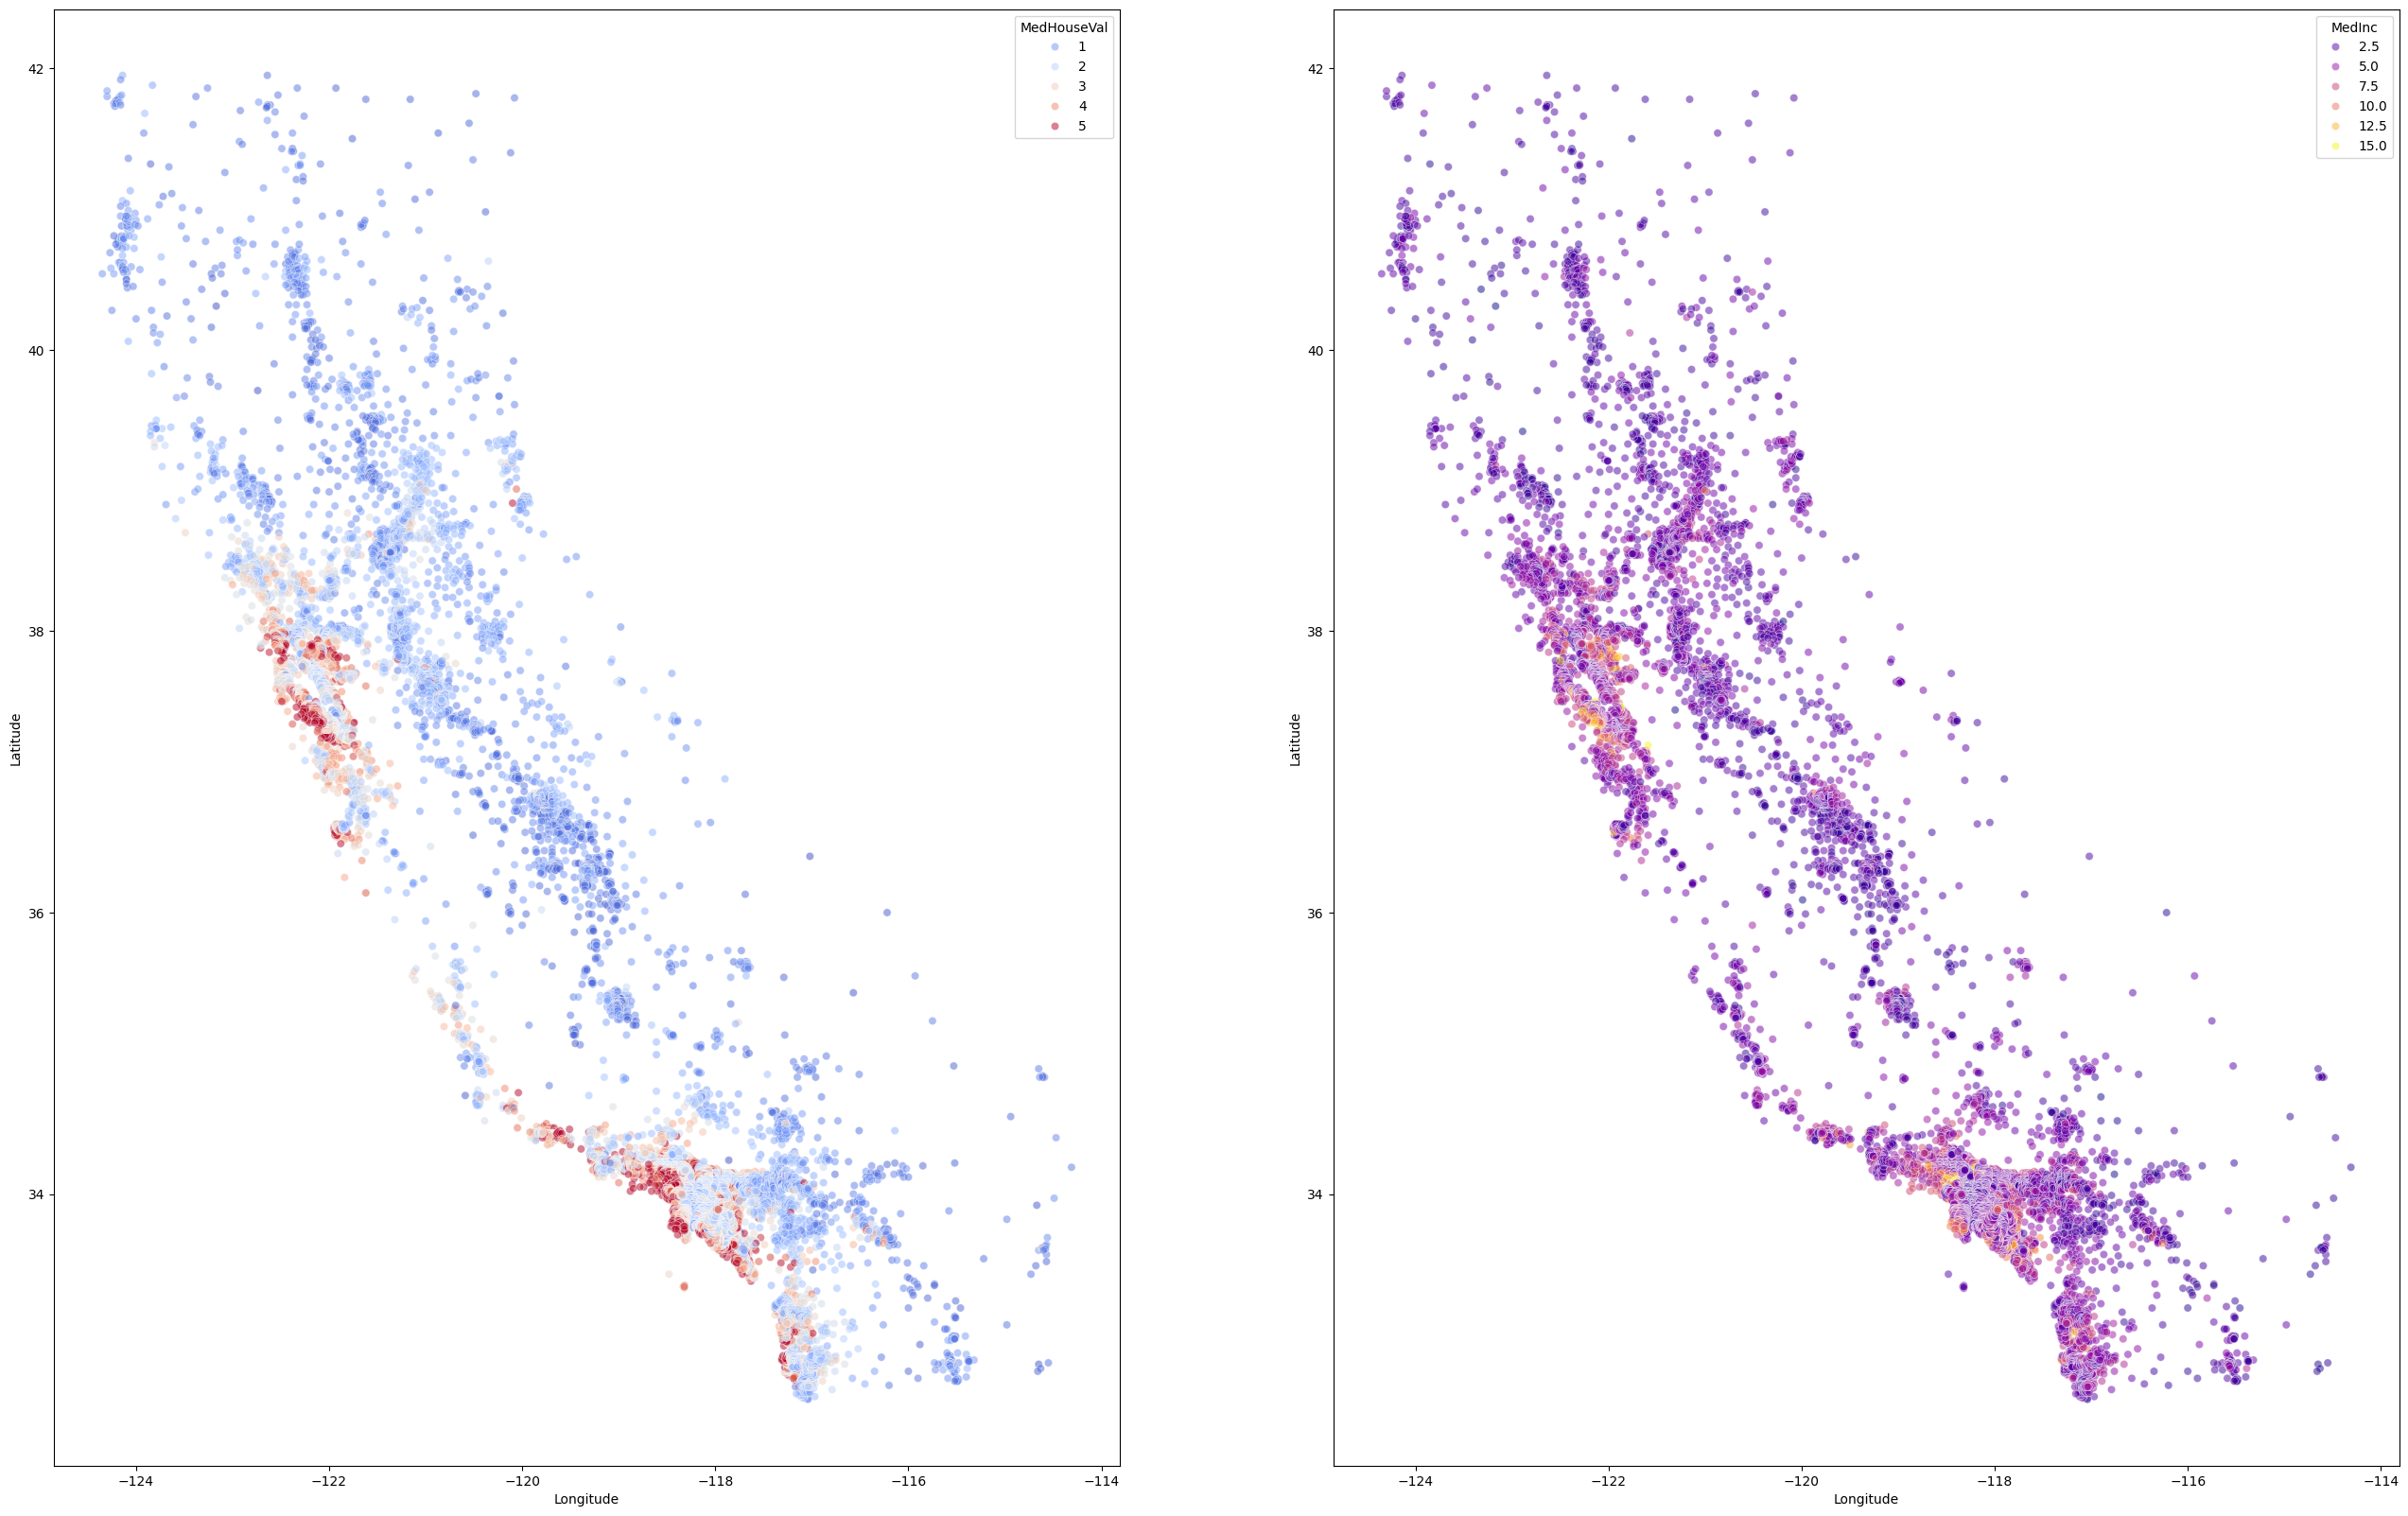

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(32, 20))

sns.scatterplot(
    x="Longitude", y="Latitude",
    hue="MedHouseVal",
    data=handler.df, ax=axs[0],
    palette="coolwarm", alpha=0.5
)

sns.scatterplot(
    x="Longitude", y="Latitude",
    hue="MedInc",
    data=handler.df, ax=axs[1],
    palette="plasma", alpha=0.5
)

plt.show()

## Zoom on Los Angeles

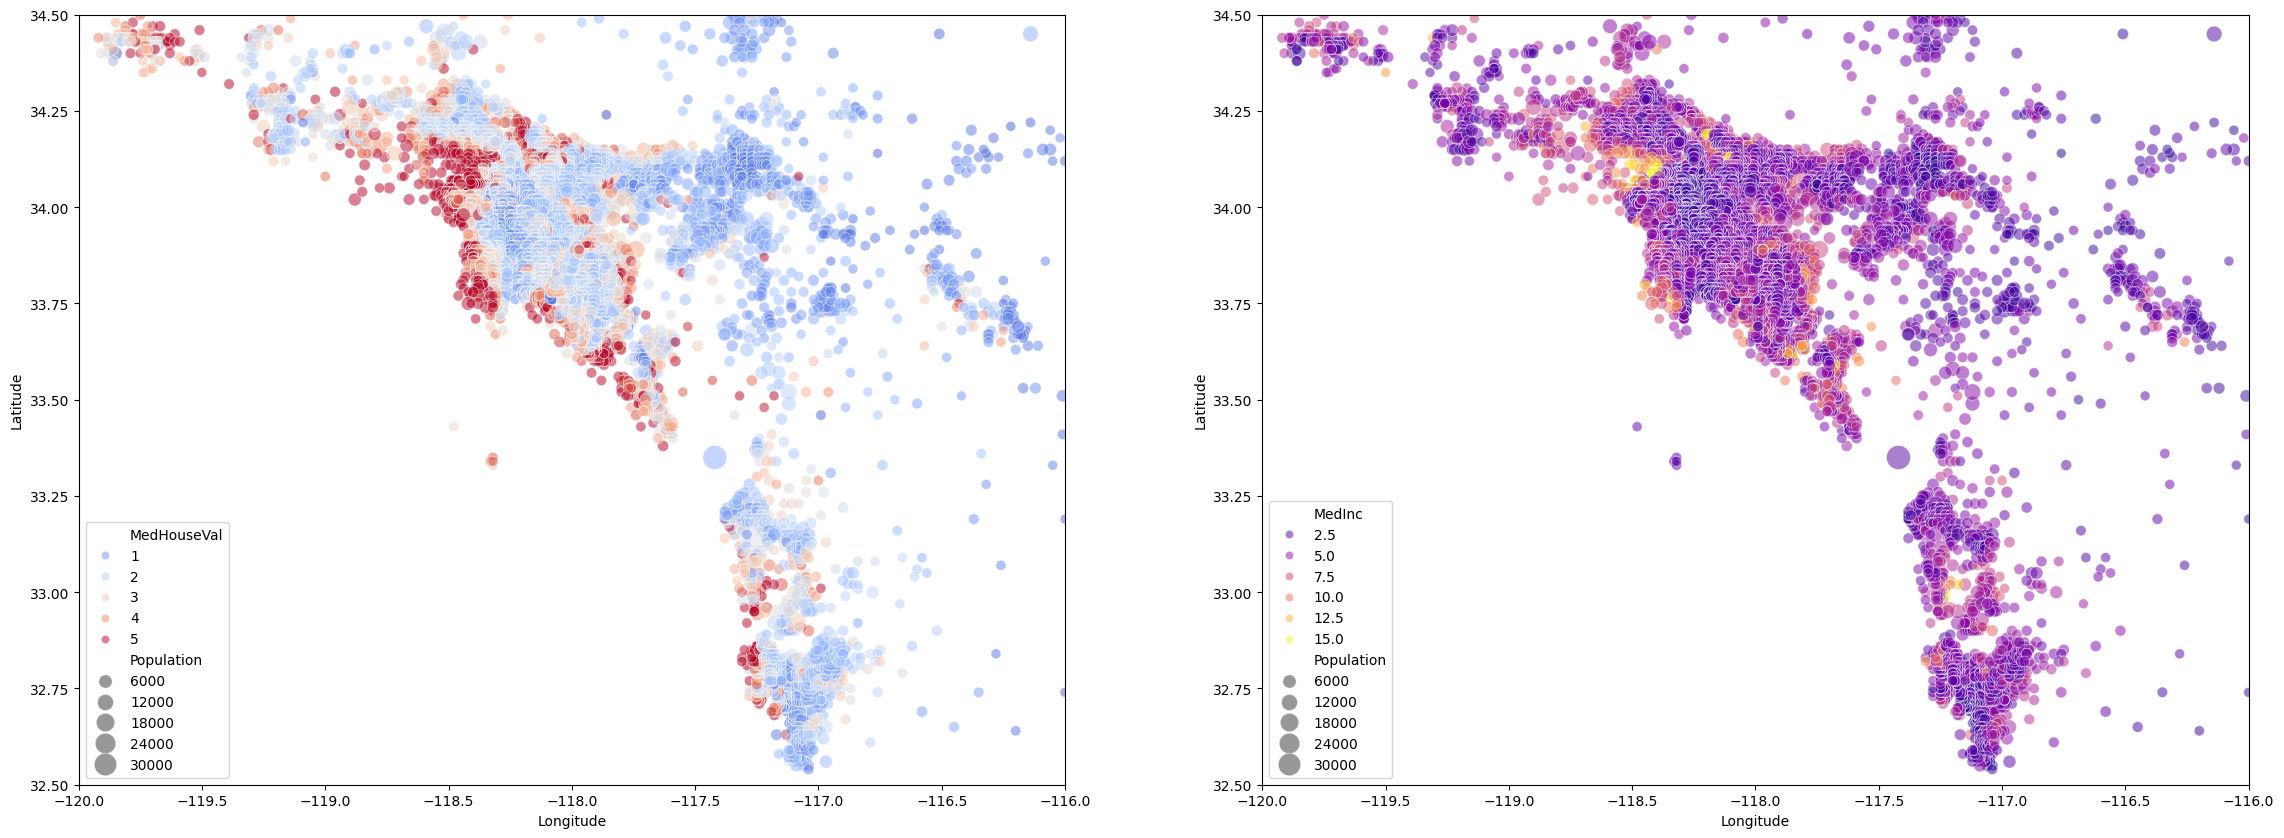

In [8]:
# Define bounds
lon_min, lon_max = -120, -116
lat_min, lat_max = 32.5, 34.5

# Filter DataFrame
df_quad = handler.df[
    (handler.df["Longitude"] >= lon_min) & (handler.df["Longitude"] <= lon_max) &
    (handler.df["Latitude"]  >= lat_min) & (handler.df["Latitude"]  <= lat_max)
]


fig, axs = plt.subplots(1, 2, figsize=(28, 10))

sns.scatterplot(x="Longitude", y="Latitude", hue="MedHouseVal",
                size="Population", sizes=(50,300),
                data=df_quad, ax=axs[0], palette="coolwarm", alpha=0.5)

sns.scatterplot(x="Longitude", y="Latitude", hue="MedInc",
                size="Population", sizes=(50,300),
                data=df_quad, ax=axs[1], palette="plasma", alpha=0.5)

for ax in axs:
    ax.set_xlim(lon_min, lon_max)
    ax.set_ylim(lat_min, lat_max)

## Zoom on San Francisco

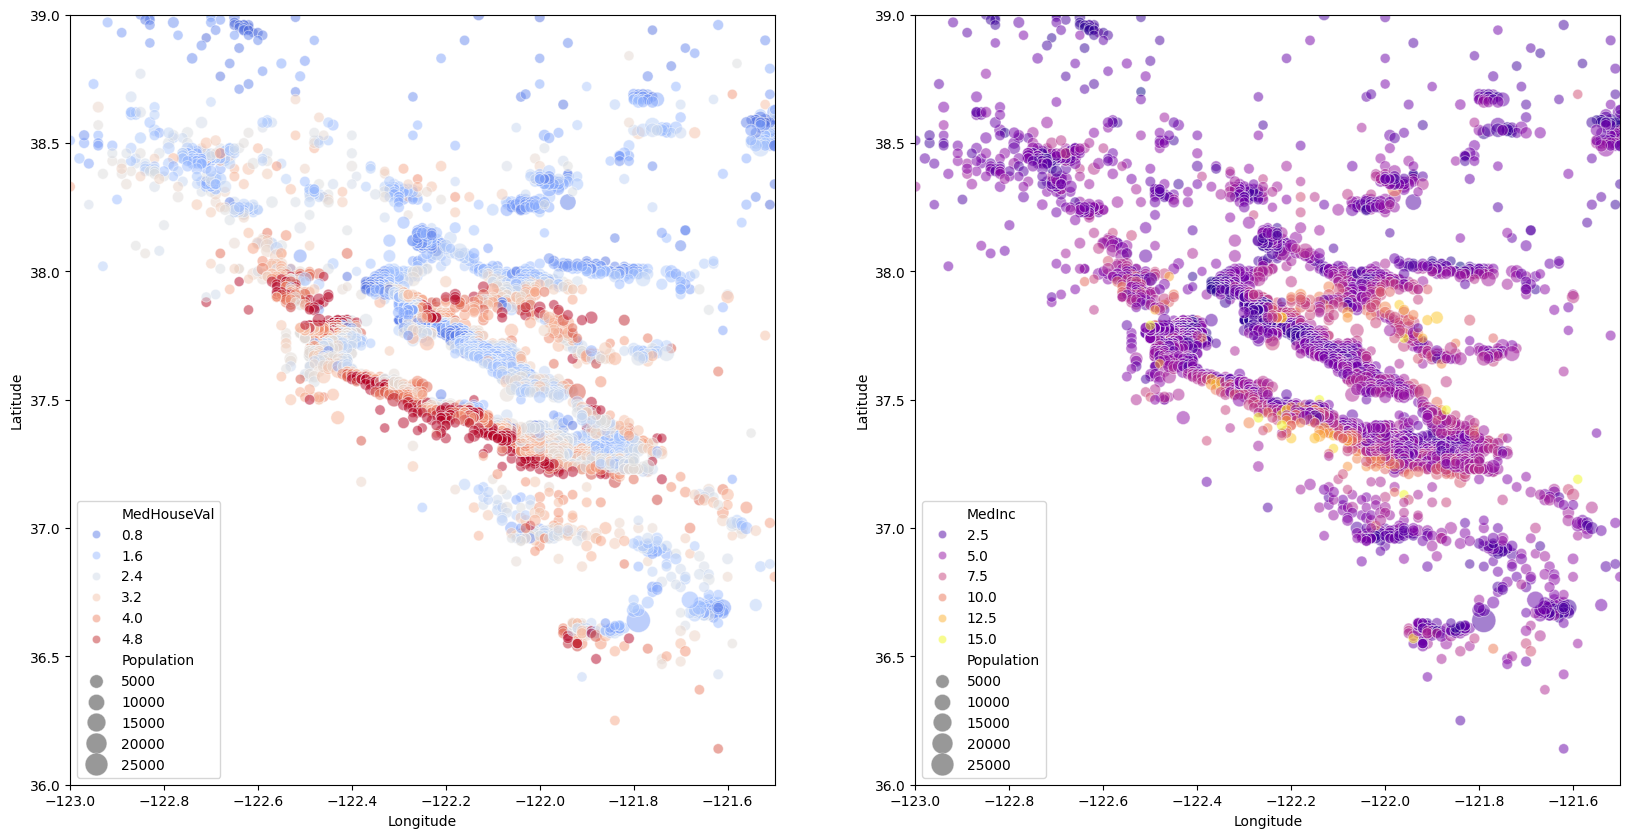

In [9]:
# Define bounds
lon_min, lon_max = -123, -121.5
lat_min, lat_max = 36, 39

# Filter DataFrame
df_quad = handler.df[
    (handler.df["Longitude"] >= lon_min) & (handler.df["Longitude"] <= lon_max) &
    (handler.df["Latitude"]  >= lat_min) & (handler.df["Latitude"]  <= lat_max)
]


fig, axs = plt.subplots(1, 2, figsize=(20, 10))

sns.scatterplot(x="Longitude", y="Latitude", hue="MedHouseVal",
                size="Population", sizes=(50,300),
                data=df_quad, ax=axs[0], palette="coolwarm", alpha=0.5)

sns.scatterplot(x="Longitude", y="Latitude", hue="MedInc",
                size="Population", sizes=(50,300),
                data=df_quad, ax=axs[1], palette="plasma", alpha=0.5)

for ax in axs:
    ax.set_xlim(lon_min, lon_max)
    ax.set_ylim(lat_min, lat_max)

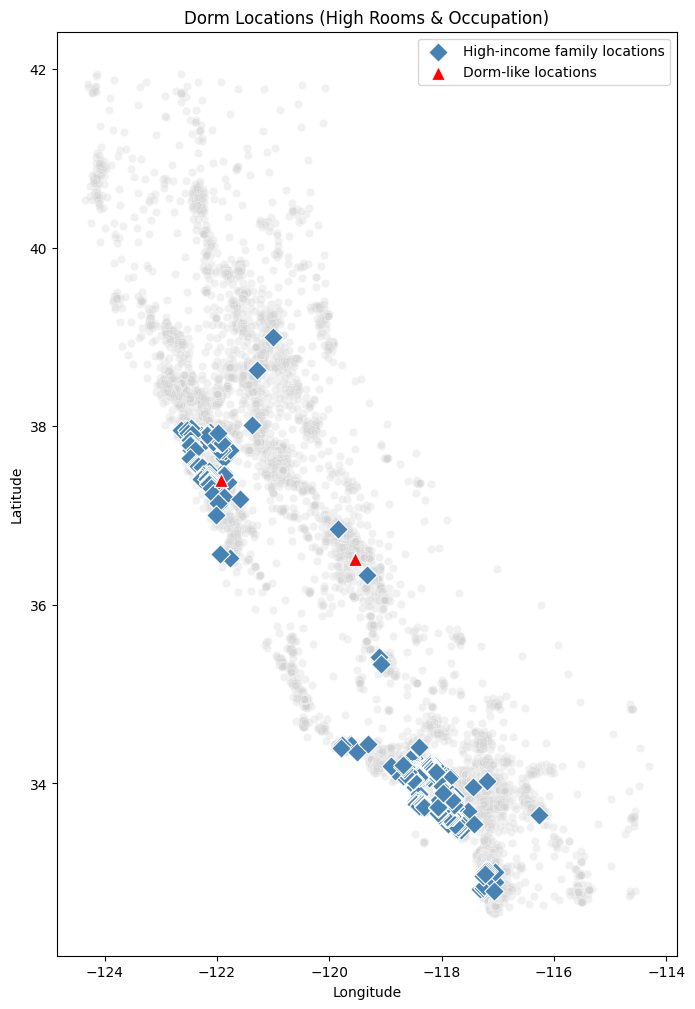

In [19]:
# Filter dorm-like locations
dorms_df = handler.df[
    (handler.df["AveRooms"] > 10) &
    (handler.df["AveOccup"] > 5)
]

# Filter rich families-like locations
rich_df = handler.df[
    (handler.df["MedInc"] > 9) &
    (handler.df['AveOccup'] < 6) 
]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 12))

# Base scatterplot (all data)
sns.scatterplot(
    x="Longitude", y="Latitude",
    data=handler.df, color="lightgray", alpha=0.3, ax=ax
)
# Highlight Rich families
sns.scatterplot(
    x="Longitude", y="Latitude",
    data=rich_df, color="steelblue", s=100, marker="D", ax=ax,
    label="High-income family locations"
)

# Highlight dorms
sns.scatterplot(
    x="Longitude", y="Latitude",
    data=dorms_df, color="red", s=100, marker="^", ax=ax,
    label="Dorm-like locations"
)


ax.set_title("Dorm Locations (High Rooms & Occupation)")
ax.legend()
plt.show()



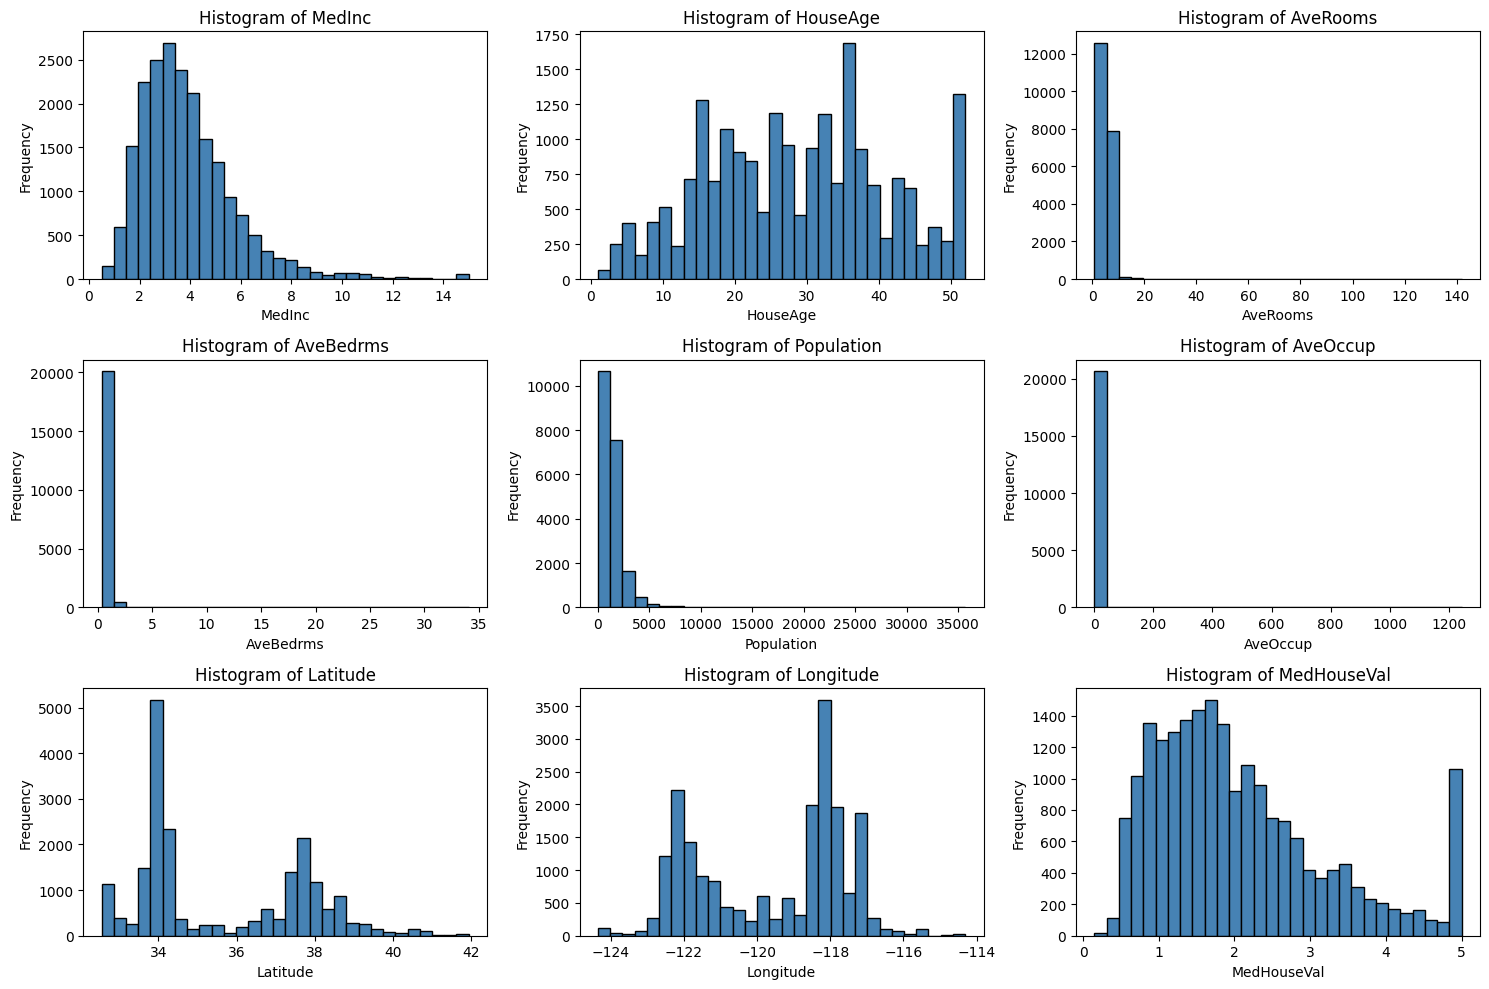

In [11]:
numeric_cols = handler.df.select_dtypes(include='number').columns
n_cols = len(numeric_cols)

# Choose how many plots per row
cols = 3
rows:int = int(np.ceil(n_cols / cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()  # make iterable

for i, col in enumerate(numeric_cols):
    axes[i].hist(handler.df[col].dropna(), bins=30, color='steelblue', edgecolor='black')
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Hide unused subplots if any
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



## Use logarithmic scale for "strange" graphs

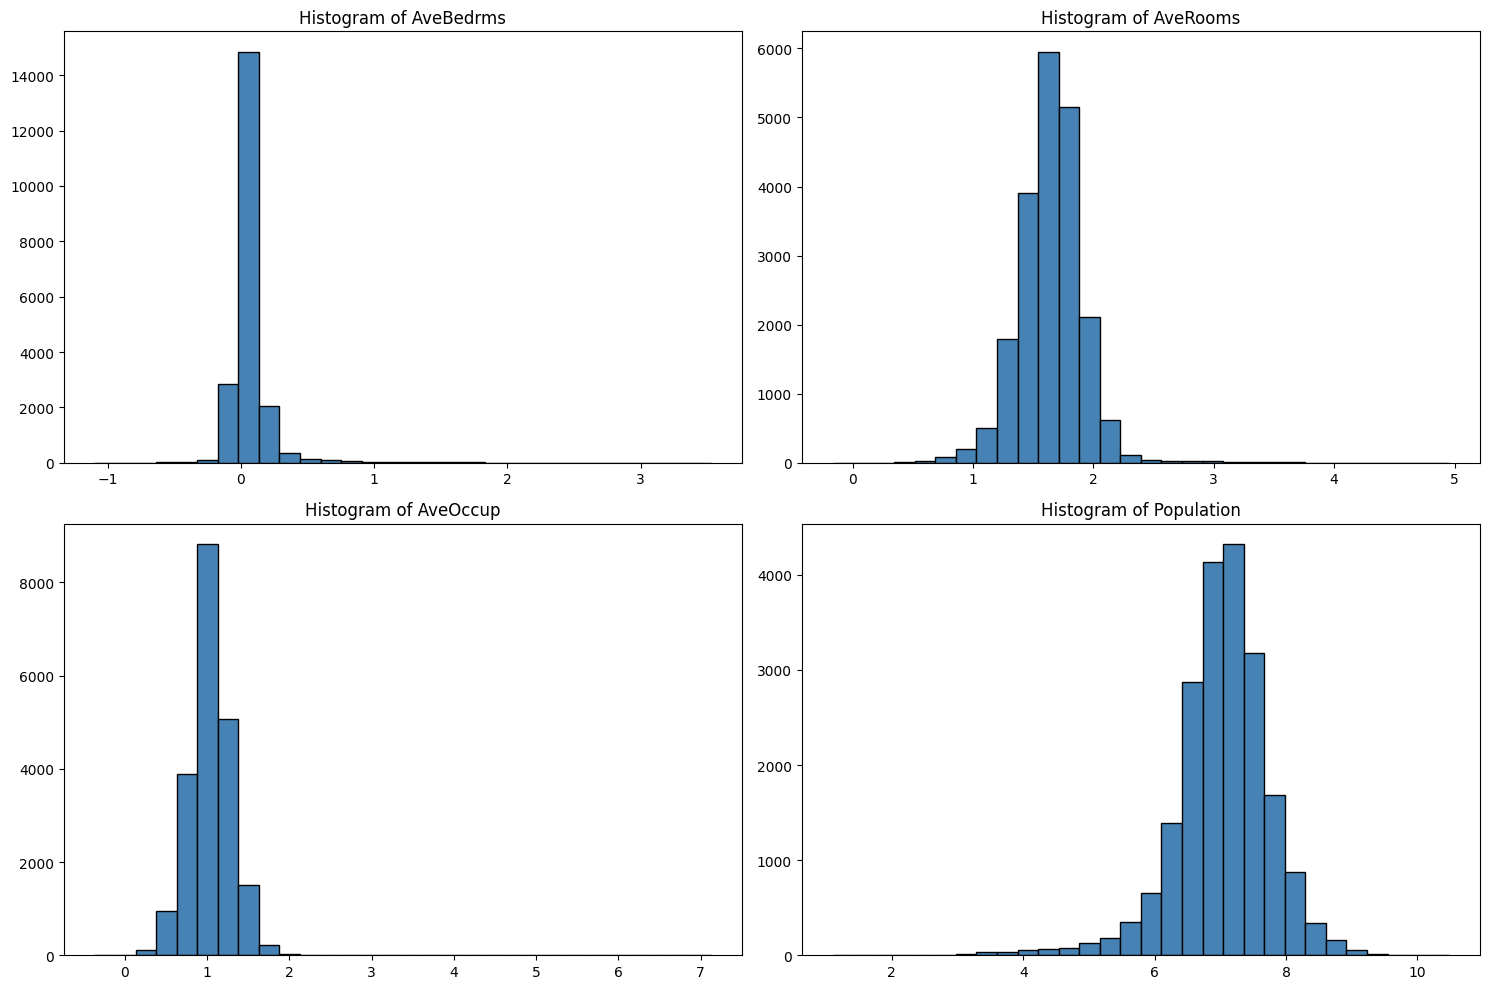

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

axes[0].hist(df_log['AveBedrms'], bins=30, color='steelblue', edgecolor='black')
axes[0].set_title("Histogram of AveBedrms")

axes[1].hist(df_log['AveRooms'], bins=30, color='steelblue', edgecolor='black')
axes[1].set_title("Histogram of AveRooms")

axes[2].hist(df_log['AveOccup'], bins=30, color='steelblue', edgecolor='black')
axes[2].set_title("Histogram of AveOccup")

axes[3].hist(df_log['Population'], bins=30, color='steelblue', edgecolor='black')
axes[3].set_title("Histogram of Population")

plt.tight_layout()
plt.show()

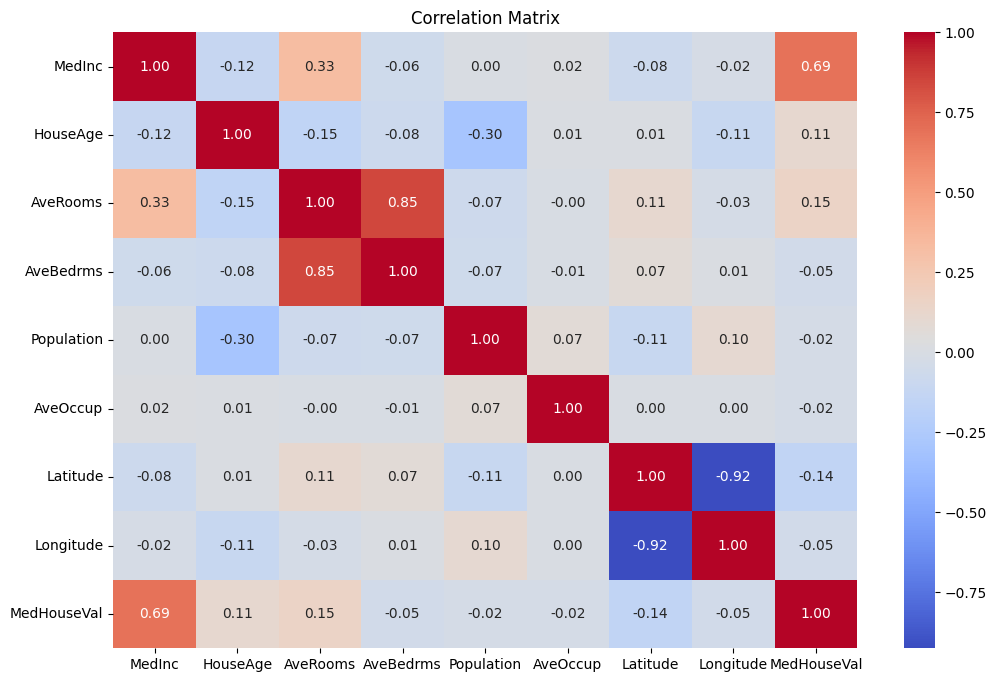

In [13]:
# Compute correlation matrix
corr = handler.df.corr()

# Plot with seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
